# Comparando histogramas de amostras

## importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PATH_SEM_OTSU = './csvs/lbp_toras.csv'
PATH_COM_OTSU = './csvs/otsu_lbp_toras.csv'

sem_otsu_df = pd.read_csv(PATH_SEM_OTSU, index_col=0)
com_otsu_df = pd.read_csv(PATH_COM_OTSU, index_col=0)

N_ROWS = len(sem_otsu_df)
qtd_por_classe = N_ROWS // 4

index_list = []
for i in range(0, N_ROWS, qtd_por_classe):
  index_list.append(
    np.random.randint(i, i+qtd_por_classe, size=3))

index_arr = np.array(index_list).flatten()
index_arr

array([  97,  105,   66,  559,  343,  329,  845,  748,  783, 1052,  907,
        910])

In [2]:
amostras_sem = sem_otsu_df.loc[index_arr]
amostras_sem['condition'] = 'sem otsu'

amostras_com = com_otsu_df.loc[index_arr]
amostras_com['condition'] = 'com ostu'

amostras = pd.concat([amostras_sem, amostras_com], ignore_index=True)
amostras['col_idx'] = [i % 3 for i in range(len(amostras))]
amostras

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,target,condition,col_idx
0,1596.0,1111.0,45.0,262.0,42.0,1106.0,50.0,312.0,46.0,274.0,...,940.0,104.0,218.0,110.0,970.0,2177.0,3699.0,0,sem otsu,0
1,1981.0,1265.0,65.0,295.0,87.0,1274.0,51.0,297.0,66.0,366.0,...,1153.0,74.0,252.0,108.0,1137.0,2178.0,3981.0,0,sem otsu,1
2,1598.0,1028.0,42.0,332.0,36.0,1045.0,45.0,398.0,42.0,375.0,...,765.0,132.0,293.0,108.0,770.0,2624.0,4115.0,0,sem otsu,2
3,1809.0,858.0,44.0,249.0,58.0,840.0,52.0,249.0,52.0,187.0,...,663.0,77.0,190.0,95.0,682.0,2163.0,3709.0,1,sem otsu,0
4,2256.0,1765.0,67.0,269.0,54.0,1733.0,53.0,288.0,63.0,399.0,...,1509.0,124.0,259.0,150.0,1528.0,3043.0,5056.0,1,sem otsu,1
5,858.0,672.0,26.0,156.0,23.0,693.0,21.0,124.0,23.0,158.0,...,596.0,43.0,149.0,50.0,584.0,1150.0,1970.0,1,sem otsu,2
6,1835.0,857.0,61.0,359.0,76.0,894.0,68.0,324.0,58.0,317.0,...,717.0,98.0,331.0,112.0,734.0,1970.0,3634.0,2,sem otsu,0
7,1726.0,720.0,66.0,405.0,65.0,714.0,65.0,420.0,48.0,328.0,...,608.0,124.0,411.0,94.0,577.0,2058.0,3605.0,2,sem otsu,1
8,2719.0,873.0,90.0,592.0,131.0,861.0,103.0,584.0,127.0,421.0,...,723.0,140.0,590.0,142.0,709.0,2762.0,5111.0,2,sem otsu,2
9,1429.0,803.0,41.0,135.0,51.0,721.0,42.0,128.0,61.0,149.0,...,595.0,84.0,180.0,81.0,593.0,1672.0,2789.0,3,sem otsu,0


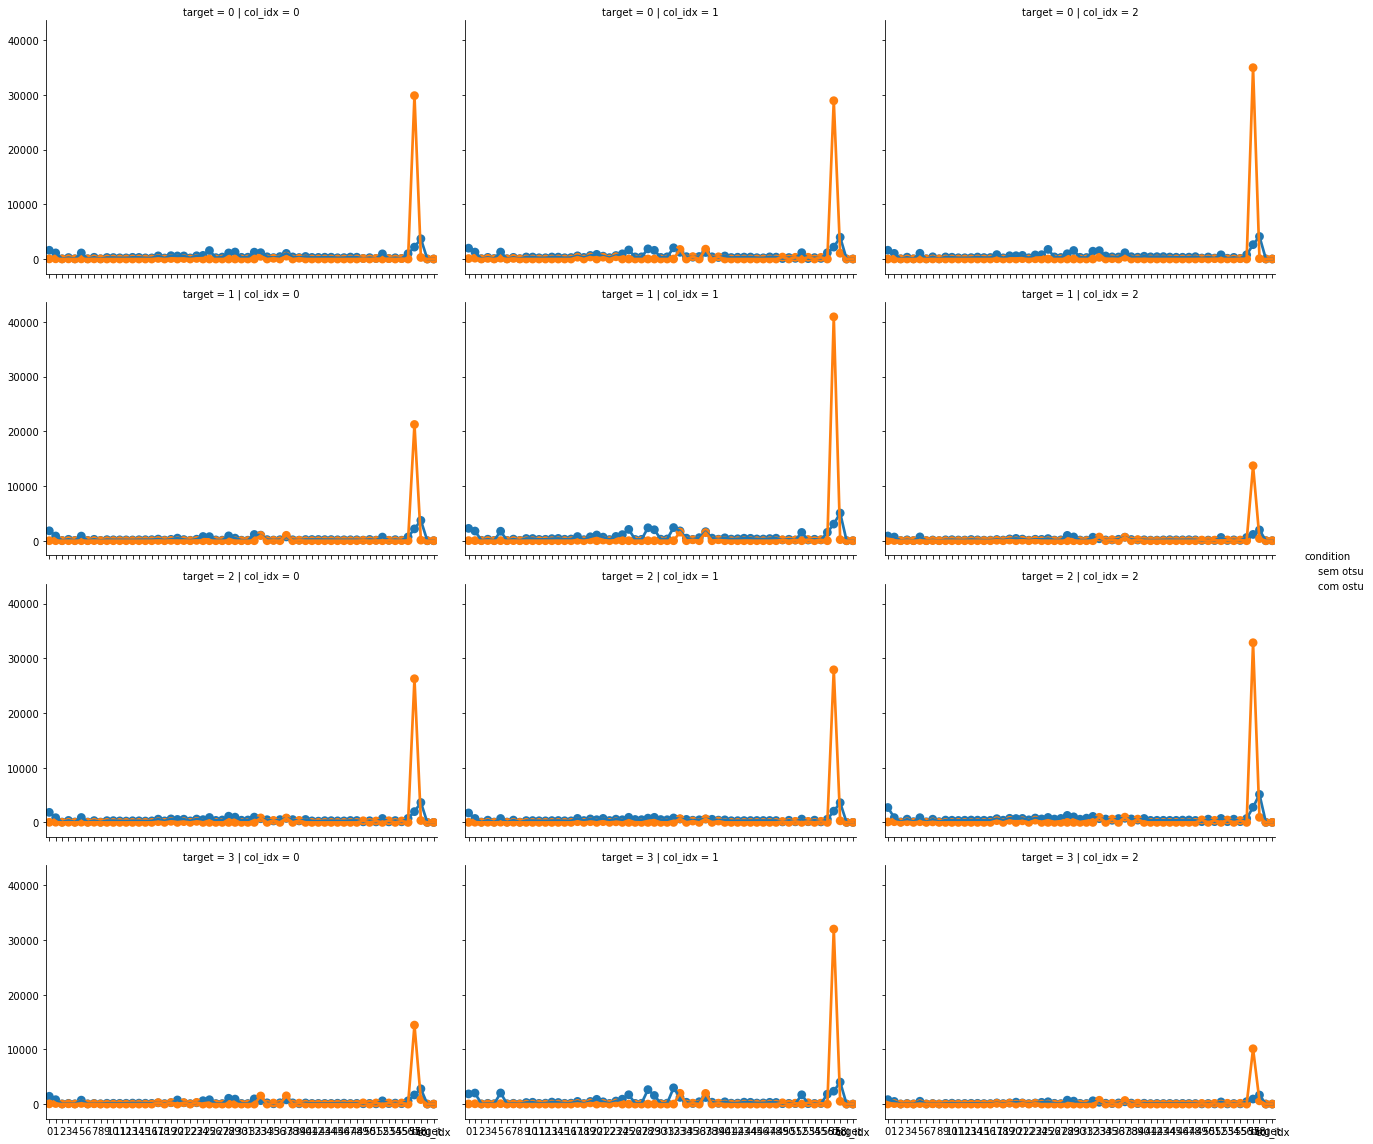

In [3]:
g = sns.FacetGrid(
  data=amostras,
  hue='condition',
  col='col_idx',
  row='target',
  height=4,
  aspect=1.5
)

g.map_dataframe(sns.pointplot)
g.add_legend()

TARGET_NAMES = {'broca': 0, 'fissura': 1, 'musgo': 2, 'quebra': 3}